# 머신러닝 프레임워크 : scikit-learn
: 다양한 분류기를 지원하며, 검증하는 기능, 분류, 회귀, 클러스터링, 차원축소법이 가능하면 샘플데이터로 제공합니다.

In [1]:
# XOR 연산 학습해보기
xor_input = [
    [0,0,0],
    [0,1,1],
    [1,0,1],
    [1,1,0]
]

xor_input

[[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0]]

In [4]:
import pandas as pd

xor_df = pd.DataFrame(xor_input)
xor_data = xor_df.iloc[:,0:2] # Feature Columns
xor_label = xor_df.iloc[:,2] # Target Columns
xor_label

0    0
1    1
2    1
3    0
Name: 2, dtype: int64

In [5]:
# 데이터 학습과 에측하기
from sklearn import svm, metrics # metrics는 정확도 구할 때 등 사용

clf = svm.SVC()
clf.fit(xor_data, xor_label) # fit : also same at deep learning
pred = clf.predict(xor_data)
print(pred)

[0 1 1 0]


In [6]:
# 정답률 구하기
ac_score = metrics.accuracy_score(xor_label, pred) # 정답, 예측
print('정답률 : ', ac_score)

정답률 :  1.0


In [7]:
# 정답률 구하기 : predict를 구하지 않고 정답률 구하기
clf.score(xor_data, xor_label)

1.0

> score은 train, test 데이터를 비교할 때 사용한다.   
> predict는 예측률을 구하는 것

---
### 붓꽃의 품종 분류하기


In [8]:
iris = pd.read_csv('../data/iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
# 기본 통계량 확인하기
iris.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Name         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
# NaN 확인하기
(iris.isnull()).sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Name           0
dtype: int64

In [14]:
iris.Name.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [17]:
color_tmp = []

for name in iris['Name']:
    if name == 'Iris-setosa':
        color_tmp.append('red')
    elif name == 'Iris-versicolor':
        color_tmp.append('green')
    else:
        color_tmp.append('blue')

iris['Color'] = color_tmp
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Color
0,5.1,3.5,1.4,0.2,Iris-setosa,red
1,4.9,3.0,1.4,0.2,Iris-setosa,red
2,4.7,3.2,1.3,0.2,Iris-setosa,red
3,4.6,3.1,1.5,0.2,Iris-setosa,red
4,5.0,3.6,1.4,0.2,Iris-setosa,red


In [18]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

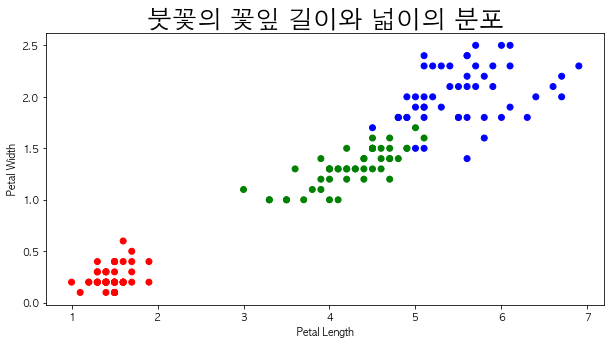

In [25]:
# Scatter
# iris.plot(
#     figsize=(10,5),
#     kind='scatter',
#     x='PetalLength',
#     y='PetalWidth',
#     color=color_tmp,
# )

plt.figure(figsize=(10,5))
plt.scatter(
    iris.PetalLength,
    iris.PetalWidth,
    c = iris.Color
)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('붓꽃의 꽃잎 길이와 넓이의 분포', size=25)

plt.show()

In [60]:
# 머신러닝을 위한 작업
iris_data = iris[['SepalLength','SepalWidth','PetalLength','PetalWidth']]
iris_label = iris.Name # 정답 만들기
print(iris_data)
print(iris_label)

     SepalLength  SepalWidth  PetalLength  PetalWidth
0            5.1         3.5          1.4         0.2
1            4.9         3.0          1.4         0.2
2            4.7         3.2          1.3         0.2
3            4.6         3.1          1.5         0.2
4            5.0         3.6          1.4         0.2
..           ...         ...          ...         ...
145          6.7         3.0          5.2         2.3
146          6.3         2.5          5.0         1.9
147          6.5         3.0          5.2         2.0
148          6.2         3.4          5.4         2.3
149          5.9         3.0          5.1         1.8

[150 rows x 4 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Name, Length: 150, dtype: object


In [61]:
# 학습용 데이터와 테스트용 데이터로 나누기
from sklearn.model_selection import train_test_split # 알아서 나눠줌

train_data, test_data, train_label, test_label = train_test_split(iris_data, iris_label)
print(train_data.head(),'\n', test_data.head())
print('-'*50)
print(train_label.head(),'\n', test_label.head())

     SepalLength  SepalWidth  PetalLength  PetalWidth
71           6.1         2.8          4.0         1.3
48           5.3         3.7          1.5         0.2
24           4.8         3.4          1.9         0.2
57           4.9         2.4          3.3         1.0
113          5.7         2.5          5.0         2.0 
      SepalLength  SepalWidth  PetalLength  PetalWidth
45           4.8         3.0          1.4         0.3
77           6.7         3.0          5.0         1.7
131          7.9         3.8          6.4         2.0
5            5.4         3.9          1.7         0.4
38           4.4         3.0          1.3         0.2
--------------------------------------------------
71     Iris-versicolor
48         Iris-setosa
24         Iris-setosa
57     Iris-versicolor
113     Iris-virginica
Name: Name, dtype: object 
 45         Iris-setosa
77     Iris-versicolor
131     Iris-virginica
5          Iris-setosa
38         Iris-setosa
Name: Name, dtype: object


In [62]:
# 학습시키기
clf = svm.SVC()
clf.fit(train_data, train_label)

SVC()

In [63]:
# 에측하기
pred = clf.predict(test_data)
print(pred[0:5])

['Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa']


In [64]:
# 정답률
ac_score = metrics.accuracy_score(test_label, pred)
print('정답률 :',ac_score)

정답률 : 0.9736842105263158


In [65]:
# train score
clf.score(train_data, train_label)

0.9821428571428571

In [66]:
# test score
clf.score(test_data, test_label)

0.9736842105263158

In [67]:
# 분류 Report() : Confusion matrix
cl_report = metrics.classification_report(test_label, pred)
print(cl_report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.97        38
      macro avg       0.98      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



> 보통은 f1 score를 보는 게 좋다.   

In [76]:
# 에측하기
x = [4.1, 3.5, 1.4, 0.2]
clf.predict([x]) # x는 1차원 대상은 2차원

array(['Iris-setosa'], dtype=object)